## Collecting Data Week 4 -- Jan-Tieme Bakema S3243222
since psaw did not work, I used praw which was recommended as an alternative online

The following video was followed as an instruction: https://www.youtube.com/watch?v=Y7BSe7EiBTs

In [25]:
!pip install praw

     |████████████████████████████████| 176 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 53 kB 2.3 MB/s eta 0:00:01


In [180]:
import praw
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [34]:
# I get the API from my other reddit account, removed the input for security reasons
reddit = praw.Reddit(client_id = " ",
                      client_secret = " ",
                      user_agent = " ",
                      username = " ",
                      password = " ")

In [204]:
# Retrieves posts of conservative subreddit (looking at r/conservative)
subred = reddit.subreddit("conservative")

# looks at top posts over a year and prints out the title, score, number of comments and the upvote ratio of these posts
for i in subred.top('year'):
    print(i.title,',',i.score,',',i.num_comments,',', i.upvote_ratio)
    
# This is a quick representation of the data, but won't be useful in this form

For those of you comparing these protests to Boston 1773, take a look at these pictures and tell me how this is patriotic to you? That is The Capitol Building. , 111197 , 7899 , 0.8
I want my taxes back , 60351 , 5202 , 0.81
Fox News: McConnell believes Trump committed impeachable offenses, supports Democrats' impeachment efforts: , 49119 , 6781 , 0.75
AMAZING! Congress Got Paid Their Full Salary of $130K for 9 Months While they Argued About Giving Every American $600 of Their Own Money , 46954 , 4680 , 0.81
House impeaches Trump for second time over Capitol riots , 45774 , 10233 , 0.72
New SEC Rule: Wall Street Will Now Only Allow Traders Who Wear A Top Hat And Monocle And Carry Around Giant Bags Of Money , 44288 , 1230 , 0.83
Electoral College Elects Biden As President , 36716 , 4323 , 0.67
Republican Starting To Think Trump Might Not Pull Off A Last-Minute 4D Chess Move , 36101 , 3178 , 0.79
Romney rips Trump over Capitol Hill mayhem: 'This is what the president has caused' , 34038 

In [205]:
# Below I transform this data into a dataframe, while also adding some other interesting columns
# I changed it to the 500 most popular posts from the year
df = []
for post in subred.top('year', limit = 500):
    df.append([post.title, post.selftext, post.score, post.num_comments,post.upvote_ratio, 'reddit.com' + post.permalink])
    
df = pd.DataFrame(df,columns=['title', 'body', 'score', 'num_comments', 'upvote_ratio', 'permalink'])    

In [206]:
## a function that retrieves most common words from a list of words
def most_common_words(list_of_words):
    dict_words = {}
    for word in list_of_words:
        if word not in dict_words: #k instead of dict_words?
            dict_words[word] = 1
        else:
            dict_words[word] += 1
    return dict_words


In [209]:
# Get all words of the posts with the fifty highest upvote ratios
high_ratio = df.nlargest(50, 'upvote_ratio')

high_ratio_words = []
for title in high_ratio['title']:
    for word in title.split():
        if word.lower() not in stopwords:
            high_ratio_words.append(word.lower())

# create dict with the word counts
dict_high = most_common_words(high_ratio_words)

#create Series the word counts
df_high = pd.Series(dict_high)

# shows 10 most common words
df_high.nlargest(10)

calls           4
china           4
trump           4
communist       3
conservative    3
free            3
republicans     3
states          3
twitter         3
party           2
dtype: int64

In [210]:
# Get all words of the posts with the fifty lowest upvote ratios
low_ratio = df.nsmallest(50, 'upvote_ratio')

low_ratio_words = []
for title in low_ratio['title']:
    for word in title.split():
        if word.lower() not in stopwords:
            low_ratio_words.append(word.lower())

# create dict with the word counts
dict_low = most_common_words(low_ratio_words)

#create Series the word counts
df_low = pd.Series(dict_low)

#shows 10 most common words
df_low.nlargest(10)

trump        6
president    5
black        4
new          3
twitter      3
-            3
facebook     2
media        2
it’s         2
acting       2
dtype: int64

Interestingly, the lower upvote ratio posts mention social media platforms, whereas the higher upvote ratio posts mention words with a political connotation like: conservative, communism, replublicans
However, the word counts are not that big so it is difficult to make real conclusions based on this

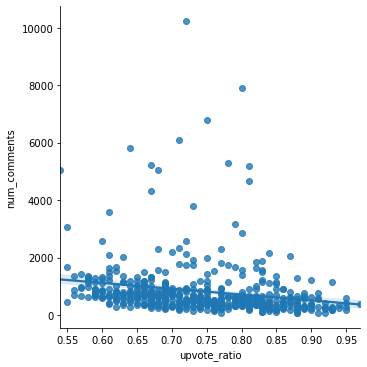

In [211]:
## Is there a correlation between number of comments and the upvote ratio
## Do posts with more comments have a lower upvote ratio?
sns.lmplot(x='upvote_ratio', y='num_comments', data=df);

In [212]:
df['num_comments'].corr(df['upvote_ratio'])

-0.19743505516112597

There does not really seem to be a correlation between number of comments on a post and the upvote ratio

The negative score does indicate that posts with more comments have a lower upvote ratio, however this association is rather weak. Therefore we cannot really say that there is a correlation between these two attributes